## Transformation: Cropping images

Let's start with a very simple operation: cropping. Cropping is the action to cut a part of the image to reframe it.

In order to crop an image, we need to copy in a new image the pixels we want to keep. Let origin be the coordinate of upper-left corner and end the coordinate of the bottom-right corner. The pixel at coordinate `(x, y)` in the new image is equal to the pixel located at coordinate `(x + origin.x, y + origin.y)` in the old image.

In [9]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load image:
input_image = Image.open("lenna.png")
input_pixels = input_image.load()

# Cropped area
origin = (130, 150)
end = (400, 320)

# Create output image
output_image = Image.new("RGB", (end[0] - origin[0], end[1] - origin[1]))
draw = ImageDraw.Draw(output_image)

# Copy pixels
for x in range(output_image.width):
    for y in range(output_image.height):
        xp, yp = x + origin[0], y + origin[1]
        draw.point((x, y), input_pixels[xp, yp])

output_image.save("cropped.png")

## Transformation: Scaling

Scaling is used to change the size of the image. It can be a scale down or up. There are several methods available to interpolate the pixels. We will use the simplest possible algorithm: Nearest Neighbor. Feel free to implement other algorithms such as the Bilinear algorithm, Box sampling, Fourier transform...

To compute the rescaled image, we need the ratio for both horizontal and vertical axes: `x_ratio = old_img.x / new_img.x` and `y_ratio = old_img.y / new_img.y`. The pixel at coordinate `(x, y)` in the new image is equal to the pixel that is located at coordinate `(floor(x * x_ratio), floor(y * y_ratio))`.

In [10]:
from PIL import Image, ImageDraw
from math import floor

# Load image:
input_image = Image.open("lenna.png")
input_pixels = input_image.load()

new_size = (300, 300)

# Create output image
output_image = Image.new("RGB", new_size)
draw = ImageDraw.Draw(output_image)

x_scale = input_image.width / output_image.width
y_scale = input_image.height / output_image.height

# Copy pixels
for x in range(output_image.width):
    for y in range(output_image.height):
        xp, yp = floor(x * x_scale), floor(y * y_scale)
        draw.point((x, y), input_pixels[xp, yp])

output_image.save("scaled.png")

## Transformation: Flipping

A flip (mirror effect) is done by reversing the pixels horizontally or vertically. For instance, for an horizontal flip, the pixel situated at coordinate `(x, y)` will be situated at coordinate `(width - x - 1, y)` in the new image.

In [11]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("lenna.png")
input_pixels = input_image.load()

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Copy pixels
for x in range(output_image.width):
    for y in range(output_image.height):
        xp = input_image.width - x - 1
        draw.point((x, y), input_pixels[xp, y])

output_image.save("flipped.png")

## Transformation: Rotating

The algorithm used for a rotation is similar to a flip: to compute the new image, we iterate over all the pixels and print the corresponding pixel from the source image.

The point situated at the coordinates (x, y) in the new image is equal to the point (xp, yp) in the input image:
```
xp = x * cos(angle) - y * sin(angle)
yp = x * sin(angle) + y * cos(angle)
```
If (xp, yp) is out of the input image, it is ignored (black pixel).

This can be used to do a rotation, however, the center of the rotation will be at coordinate (0, 0). In order to change the coordinates of the center of the rotation, we need to shift the coordinates before the rotation and after the rotation:

```
xp = (x - center_x) * cos(angle) - (y - center_y) * sin(angle) + center_x
yp = (x - center_x) * sin(angle) + (y - center_y) * cos(angle) + center_y
```

In [13]:
from PIL import Image, ImageDraw
from math import sin, cos, pi


# Load image:
input_image = Image.open("lenna.png")
input_pixels = input_image.load()

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

angle = pi / 3  # angle in radian
center_x = input_image.width / 2
center_y = input_image.height / 2

# Copy pixels
for x in range(input_image.width):
    for y in range(input_image.height):
        # Compute coordinate in input image
        xp = int((x - center_x) * cos(angle) - (y - center_y) * sin(angle) + center_x)
        yp = int((x - center_x) * sin(angle) + (y - center_y) * cos(angle) + center_y)
        if 0 <= xp < input_image.width and 0 <= yp < input_image.height:
            draw.point((x, y), input_pixels[xp, yp])

output_image.save("rotated.png")

## Colors: Luminosity

Changing the luminosity of a picture in a RGB mode can be done by adding a constant to each color component. However, this is a very simplified algorithm: the perceived luminosity has not an easy definition and there are several ways to estimate the luminosity of a pixel. Note that it is also possible to change from RGB to HSL to modify the luminosity easily.

In [14]:
from PIL import Image, ImageDraw

# Change this:
luminosity = 80

# Load image:
input_image = Image.open("lenna.png")
input_pixels = input_image.load()

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Generate image
for x in range(output_image.width):
    for y in range(output_image.height):
        r, g, b = input_pixels[x, y]
        r = int(r + luminosity)
        g = int(g + luminosity)
        b = int(b + luminosity)
        draw.point((x, y), (r, g, b))

output_image.save("luminosity.png")

## Colors: Contrast

The contrast is the difference in brightness (or color) that makes the objects in a picture distinguishable. The intensity histogram of an image is the distribution of pixel luminance for an image. In order to improve the contrast, we can use a linear normalization of the intensity histogram:
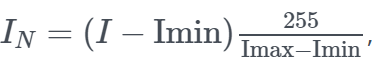
, where `In` is the normalized pixel intensity, `Imin` and `Imax` are the minimum and maximum intensity (before normalization).

In [15]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("lenna.png")
input_pixels = input_image.load()

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Find minimum and maximum luminosity
imin = 255
imax = 0
for x in range(input_image.width):
    for y in range(input_image.height):
        r, g, b = input_pixels[x, y]
        i = (r + g + b) / 3
        imin = min(imin, i)
        imax = max(imax, i)

# Generate image
for x in range(output_image.width):
    for y in range(output_image.height):
        r, g, b = input_pixels[x, y]
        # Current luminosity
        i = (r + g + b) / 3
        # New luminosity
        ip = 255 * (i - imin) / (imax - imin)
        r = int(r * ip / i)
        g = int(g * ip / i)
        b = int(b * ip / i)
        draw.point((x, y), (r, g, b))

output_image.save("contrast.png")

## Colors: Colorize

In the previous example, we saw how to adjust the color of the pixels. This can be used to change the color balance for instance. In the next example, we detect the pixels whose color is close to blue (0, 0, 255) by computing a distance, and we reduce the value of the red and blue components and increase the green component.

In [16]:
from PIL import Image, ImageDraw

# Square distance between 2 colors
def distance2(color1, color2):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    return (r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2

color_to_change = (0, 0, 255)
threshold = 220

# Load image:
input_image = Image.open("lenna.png")
input_pixels = input_image.load()

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Generate image
for x in range(output_image.width):
    for y in range(output_image.height):
        r, g, b = input_pixels[x, y]
        if distance2(color_to_change, input_pixels[x, y]) < threshold ** 2:
            r = int(r * .5)
            g = int(g * 1.25)
            b = int(b * .5)
        draw.point((x, y), (r, g, b))

output_image.save("colorized.png")

## Filtering: Blurring

A simple blur can be done using this kernel:
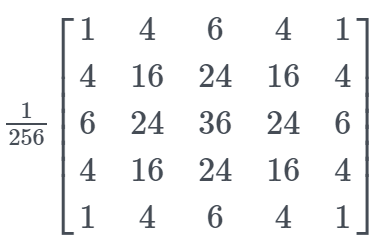
This is called the Box Blur. Each pixel is computed as the average of the surrounding pixels.
And here is the kernel for the Gaussian Blur:
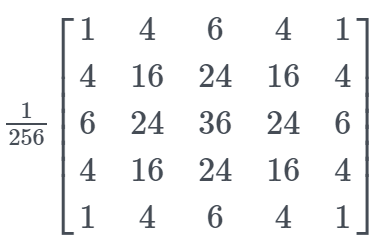
As you can see, it's a weighted mean of the surrounding pixels that gives more weight to the pixel near the current pixel. This kind of filter is also called a low-pass filter.

In [17]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("lenna.png")
input_pixels = input_image.load()

# Box Blur kernel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]

# Gaussian kernel
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

# Select kernel here:
kernel = box_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]

        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
    
output_image.save("blurred.png")